In [35]:
# import functions
import idaes
import pandas as pd
import numpy as np
from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)

from idaes.core import FlowsheetBlock
import idaes.logger as idaeslog
from pyomo.opt import TerminationCondition, SolverStatus
# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)
# Import unit models from the model library
from idaes.generic_models.unit_models import Flash
# Import degrees of freedom tool
from idaes.core.util.model_statistics import degrees_of_freedom
# import HFC_IL mixture properties
from HFC32_emimTf2N_PR import configuration

# Read data
data = pd.read_csv('R32_emimTf2N.csv')
data_323= data[15:23]
print(data_323)

    temperature  pressure  x_R32  x_emimTf2N
15       323.15     10200  0.005       0.995
16       323.15    100300  0.055       0.945
17       323.15    249700  0.133       0.867
18       323.15    400100  0.200       0.800
19       323.15    549500  0.264       0.736
20       323.15    700300  0.320       0.680
21       323.15    850400  0.368       0.632
22       323.15   1000400  0.417       0.583


   **Run Parameter Estimation Function**

In [36]:
#run parameter estimation function

from binary_param import binary_params_peng
from HFC32_emimTf2N_PR import configuration

binary_params_peng('R32_emimTf2N.csv', configuration, 'R32', 'emimTf2N', "x_R32", "x_emimTf2N", 
    init_temp = 323.15, init_press = 399800, init_x_c1 = 0.5, init_x_c2 = 0.5,
    init_kappa_2_1 = 0.025, init_kappa_1_2 = -0.03, eps = 0.1, scaling_fac = 1e-4)



2021-03-09 15:09:05 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Liq was not assigned a type. Using generic Phase object.
2021-03-09 15:09:05 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Vap was not assigned a type. Using generic Phase object.
2021-03-09 15:09:05 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component emimTf2N was not assigned a type. Using generic Component object.
2021-03-09 15:09:05 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R32 was not assigned a type. Using generic Component object.
2021-03-09 15:09:05 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-03-09 15:09:05 [INFO] idaes.init.fs.state_block: Property

2021-03-09 15:09:07 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R32 was not assigned a type. Using generic Component object.
2021-03-09 15:09:07 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-03-09 15:09:07 [INFO] idaes.init.fs.state_block: Property package initialization: infeasible - Converged to a locally infeasible point. Problem may be infeasible..
2021-03-09 15:09:07 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Liq was not assigned a type. Using generic Phase object.
2021-03-09 15:09:07 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Vap was not assigned a type. Using generic Phase object.
2021-03-09 15:09:07 [WARNING] idaes.generic_models.properties.core.generic.g

2021-03-09 15:09:10 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Liq was not assigned a type. Using generic Phase object.
2021-03-09 15:09:10 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Vap was not assigned a type. Using generic Phase object.
2021-03-09 15:09:10 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component emimTf2N was not assigned a type. Using generic Component object.
2021-03-09 15:09:10 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R32 was not assigned a type. Using generic Component object.
2021-03-09 15:09:10 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-03-09 15:09:10 [INFO] idaes.init.fs.state_block: Property

2021-03-09 15:09:12 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R32 was not assigned a type. Using generic Component object.
2021-03-09 15:09:12 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-03-09 15:09:12 [INFO] idaes.init.fs.state_block: Property package initialization: infeasible - Converged to a locally infeasible point. Problem may be infeasible..
2021-03-09 15:09:12 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Liq was not assigned a type. Using generic Phase object.
2021-03-09 15:09:12 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Vap was not assigned a type. Using generic Phase object.
2021-03-09 15:09:12 [WARNING] idaes.generic_models.properties.core.generic.g

2021-03-09 15:09:14 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Liq was not assigned a type. Using generic Phase object.
2021-03-09 15:09:14 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Vap was not assigned a type. Using generic Phase object.
2021-03-09 15:09:14 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component emimTf2N was not assigned a type. Using generic Component object.
2021-03-09 15:09:14 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R32 was not assigned a type. Using generic Component object.
2021-03-09 15:09:14 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-03-09 15:09:14 [INFO] idaes.init.fs.state_block: Property

   **Create Flash Model**

In [37]:
m = ConcreteModel()

m.fs = FlowsheetBlock(default={"dynamic": False})

m.fs.properties = GenericParameterBlock(default=configuration)

m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

# set heat transfer tru, fix outlet T

DOF_initial = degrees_of_freedom(m)
print('The initial DOF is {0}'.format(DOF_initial))

2021-03-09 15:09:16 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Liq was not assigned a type. Using generic Phase object.
2021-03-09 15:09:16 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Vap was not assigned a type. Using generic Phase object.
2021-03-09 15:09:16 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component emimTf2N was not assigned a type. Using generic Component object.
2021-03-09 15:09:16 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R32 was not assigned a type. Using generic Component object.
2021-03-09 15:09:16 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
The initial DOF is 7


In [38]:
#Load data for a single temperature
data=pd.read_csv('~/Documents/Github/extractive-distillation2/R32_emimTf2N.csv')
# input infor into model
m.fs.F101.inlet.flow_mol.fix(1)                            # mol frac
m.fs.F101.inlet.temperature.fix(323.15)                    # K
m.fs.F101.inlet.pressure.fix(7.003E5)                      # Pa
m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.320)         # mol frac
m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].fix(0.680)    # mol frac
# fix state variables in  state block (inlet)
m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].unfix()

# initialize flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# DOF analysis
degrees_of_freedom(m.fs.F101)

# Solver
solver = SolverFactory('ipopt')
solver.options = {'tol': 1e-6}

In [39]:
# # Initialize the flash unit
# m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# # Fix the state variables on the state block
# # m.fs.F101.inlet.pressure.unfix()
# m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].unfix()

# R32_x = np.zeros((len(data)))
# P = np.zeros((len(data)))

# m.fs.liq = Param(mutable=True,default=0.040)
# m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "emimTf2N"] == m.fs.liq)

# for i in range(len(data)):
#     m.fs.liq = data["x_emimTf2N"].iloc[i]
#     m.fs.F101.inlet.temperature.fix(float(data["temperature"].iloc[i]))
#     m.fs.F101.inlet.pressure.fix(float(data["pressure"].iloc[i]))
#     m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(data["x_R32"].iloc[i])+0.1)
#     m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].fix(float(1-(data["x_R32"].iloc[i]+0.1)))
#     m.fs.F101.vap_outlet.temperature.fix(float(data["temperature"].iloc[i]))
    
#     DOF_final = degrees_of_freedom(m)
#     print("The final DOF is {0}".format(DOF_final))
#     m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    
#     status = solver.solve(m, tee = False)

# #     m.fs.F101.report()
#     if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):

#         R32_x[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32']) 
#         P[i] = value(m.fs.F101.vap_outlet.pressure[0])

#     else:
#         print('Infeasible.')

In [40]:
print(len(data_323))
print(data_323)

8
    temperature  pressure  x_R32  x_emimTf2N
15       323.15     10200  0.005       0.995
16       323.15    100300  0.055       0.945
17       323.15    249700  0.133       0.867
18       323.15    400100  0.200       0.800
19       323.15    549500  0.264       0.736
20       323.15    700300  0.320       0.680
21       323.15    850400  0.368       0.632
22       323.15   1000400  0.417       0.583


In [41]:
# Initialize the flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# Fix the state variables on the state block
# m.fs.F101.inlet.pressure.unfix()
m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].unfix()

R32_x = np.zeros((len(data_323))) # liquid mol fraction of R32 out of flash
P = np.zeros((len(data_323)))     # vapor pressure of system put of flash

m.fs.liq = Param(mutable=True,default=0.040)
m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "emimTf2N"] == m.fs.liq)

for i in range(len(data_323)):
    m.fs.liq = data_323["x_emimTf2N"].iloc[i]
    m.fs.F101.inlet.temperature.fix(float(data_323["temperature"].iloc[i]))
    m.fs.F101.inlet.pressure.fix(float(data_323["pressure"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(data_323["x_R32"].iloc[i])+0.1)
    m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].fix(float(1-(data_323["x_R32"].iloc[i]+0.1)))
    m.fs.F101.vap_outlet.temperature.fix(float(data_323["temperature"].iloc[i]))
    
    DOF_final = degrees_of_freedom(m)
    print("The final DOF is {0}".format(DOF_final))
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    
    status = solver.solve(m, tee = False)

#     m.fs.F101.report()
    if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):

        R32_x[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32']) 
        P[i] = value(m.fs.F101.vap_outlet.pressure[0])

    else:
        print('Infeasible.')

The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0


In [42]:
solver = SolverFactory('ipopt')
solver.options = {'tol': 1e-6}

In [43]:
status = solver.solve(m, tee = True)

Ipopt 3.13.2: tol=1e-06


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation. S

In [44]:
# display solution
m.fs.F101.report()


m.display()
# m.pprint()


Unit : fs.F101                                                             Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key             : Value   : Fixed : Bounds
          Heat Duty : -407.26 : False : (None, None)
    Pressure Change :  49313. : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                               Inlet    Vapor Outlet  Liquid Outlet
    flow_mol                    1.0000      0.17153       0.82847  
    mole_frac_comp emimTf2N    0.48300   1.0000e-08       0.58300  
    mole_frac_comp R32         0.51700       1.0000       0.41700  
    temperature                 323.15       323.15        323.15  
    pressure                1.0004e+06   1.0497e+06    1.0497e+06  
Model unknown

  Variables:
    None

  Objectives:
    None

  Constraints:
    None

  Blocks:
    Block fs
    
      Varia

In [45]:
print(P)
print(data_323["pressure"])
print(R32_x)
print(data_323["x_R32"])

[  11014.31809137  122870.17118174  303984.60164651  466698.96563739
  629049.5140728   777295.76025953  909457.50293306 1049712.84151038]
15      10200
16     100300
17     249700
18     400100
19     549500
20     700300
21     850400
22    1000400
Name: pressure, dtype: int64
[0.005 0.055 0.133 0.2   0.264 0.32  0.368 0.417]
15    0.005
16    0.055
17    0.133
18    0.200
19    0.264
20    0.320
21    0.368
22    0.417
Name: x_R32, dtype: float64


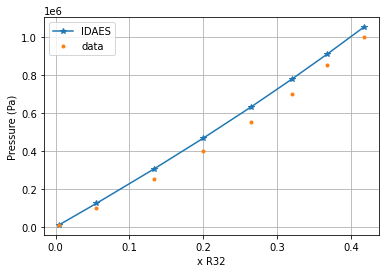

In [49]:
import matplotlib.pyplot as plt
plt.plot(R32_x,P,"-*",label="IDAES")  
plt.plot(data_323["x_R32"],data_323["pressure"],".",label="data")  

plt.ylabel('Pressure (Pa)')
plt.xlabel('x R32')
plt.grid(True)
plt.legend()
plt.show()